In [483]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1 Quick look at the data

In [484]:
# Read data
df = pd.read_csv('data/laptop_price.csv', encoding='latin-1', usecols=lambda column: column != 'laptop_ID')
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### Shape of the data

In [485]:
df.shape

(1303, 12)

### Dataset Information

#### 1 Company- String -Laptop Manufacturer
#### 2 Product -String -Brand and Model
#### 3 TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)
#### 4 Inches -Numeric- Screen Size
#### 5 ScreenResolution -String- Screen Resolution
#### 6 Cpu- String -Central Processing Unit (CPU)
#### 7 Ram -String- Laptop RAM
#### 8 Memory -String- Hard Disk / SSD Memory
#### 9 GPU -String- Graphics Processing Units (GPU)
#### 10 OpSys -String- Operating System
#### 11 Weight -String- Laptop Weight
#### 12 Price_euros -Numeric- Price (Euro)

## 2. Perform data check

### 2.1 Check missing values

In [486]:
df.isna().sum()
# There is no missing values

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

### 2.2 Check duplicates values and datatypes

In [487]:
# check for duplicates
duplicates = df[df.duplicated()]

# print the number of duplicates
print('Number of duplicates:', len(duplicates))

Number of duplicates: 28


In [488]:
df = df[~df.duplicated()]


In [489]:
# removing duplicate rows
df.shape

(1275, 12)

In [490]:
# check data types of each column
print('Data types of each column:')
print(df.dtypes)

Data types of each column:
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object


In [491]:
df.describe()

,Inches,Price_euros
count,1275.000000,1275.000000
mean,15.022902,1134.969059
std,1.429470,700.752504
min,10.100000,174.000000
25%,14.000000,609.000000
50%,15.600000,989.000000
75%,15.600000,1496.500000
max,18.400000,6099.000000


### Insight
#### The price of laptop has a very high standard deviation -> the price varies a lot

### 2.3 Check unique values and stats

In [492]:
# check number of unique values of categorical column
for column in df.columns:
    if df[column].dtype == 'O':
        unique_values = df[column].nunique()
        print('Column', column, 'has', unique_values, 'unique values')

Column Company has 19 unique values
Column Product has 618 unique values
Column TypeName has 6 unique values
Column ScreenResolution has 40 unique values
Column Cpu has 118 unique values
Column Ram has 9 unique values
Column Memory has 39 unique values
Column Gpu has 110 unique values
Column OpSys has 9 unique values
Column Weight has 179 unique values


In [493]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['Inches', 'Price_euros']

We have 10 categorical features : ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']


## Feature engineering and visualization

##### Explore Company feature

In [494]:
# Try to highlight import info in this griupby
df.groupby('Company')['Price_euros'].agg(['mean', 'median', 'sum', 'min', 'max']).sort_values(by='mean', ascending=False)



,mean,median,sum,min,max
Company,,,,,
Razer,3346.142857,2899.00,23423.00,1029.00,6099.00
LG,2099.000000,2099.00,6297.00,1899.00,2299.00
MSI,1728.908148,1599.00,93361.04,839.00,2799.00
Google,1677.666667,1559.00,5033.00,1275.00,2199.00
Microsoft,1612.308333,1569.50,9673.85,989.00,2589.00
Apple,1564.198571,1339.69,32848.17,898.94,2858.00
Huawei,1424.000000,1424.00,2848.00,1349.00,1499.00
Samsung,1413.444444,1649.00,12721.00,269.00,1849.00
Toshiba,1267.812500,1211.50,60855.00,447.00,2799.00


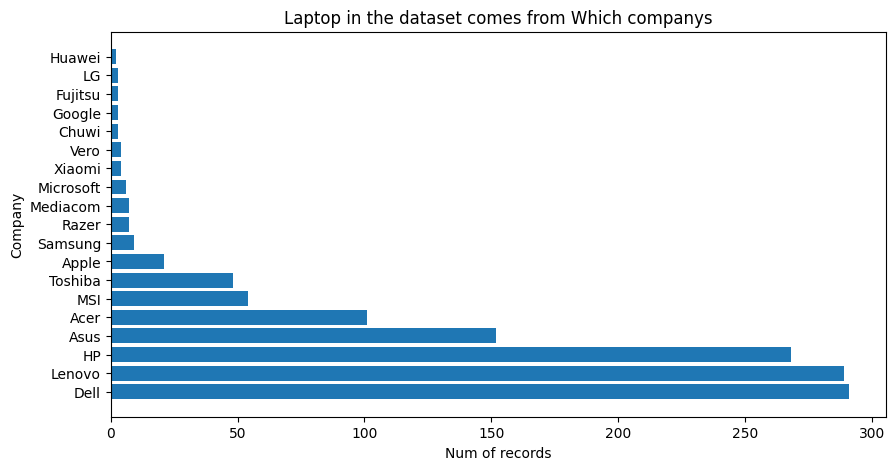

In [495]:
plt.figure(figsize=(10, 5))
# create bar chart
plt.barh(df['Company'].value_counts().index, df['Company'].value_counts())
# add labels and title
plt.xlabel('Num of records')
plt.ylabel('Company')
plt.title('Laptop in the dataset comes from Which companys')

# show the chart
plt.show()

In [496]:
## Group any company with under 10 counts into other group
other = [company for count, company  in list(zip(df['Company'].value_counts(), df['Company'].value_counts().index)) if count < 10 ]
other

['Samsung',
 'Razer',
 'Mediacom',
 'Microsoft',
 'Xiaomi',
 'Vero',
 'Chuwi',
 'Google',
 'Fujitsu',
 'LG',
 'Huawei']

In [497]:
df.loc[df['Company'].isin(other), 'Company'] = 'Other'

In [498]:
df.groupby('Company')['Price_euros'].agg(['mean', 'median', 'sum', 'min', 'max']).sort_values(by='mean', ascending=False)

,mean,median,sum,min,max
Company,,,,,
MSI,1728.908148,1599.00,93361.04,839.00,2799.0
Apple,1564.198571,1339.69,32848.17,898.94,2858.0
Other,1384.201765,1275.00,70594.29,196.00,6099.0
Toshiba,1267.812500,1211.50,60855.00,447.00,2799.0
Dell,1199.225120,999.00,348974.51,274.90,3659.4
Asus,1123.829737,1049.45,170822.12,191.90,3975.0
Lenovo,1093.862215,899.00,316126.18,229.00,4899.0
HP,1080.314664,979.00,289524.33,209.00,4389.0
Acer,633.464455,572.00,63979.91,174.00,2599.0


#### Explore TypeName and Inches features 

#### Inches and resolution are two different ways of measuring the size of a display, Products are so diverse, i'll drop product for now

In [499]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [500]:
product_ranking = df.groupby(['Product'])['Price_euros'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)
product_ranking 

,mean,median
Product,,
Zbook 17,4389.0,4389.0
Blade Pro,4119.0,3499.0
ROG G701VO,3975.0,3975.0
ROG G703VI-E5062T,3890.0,3890.0
Thinkpad P51s,3299.0,3299.0
...,...,...
E402WA-GA010T (E2-6110/2GB/32GB/W10),199.0,199.0
Chromebook C910-C2ST,199.0,199.0
V131 (X5-Z8350/4GB/32GB/FHD/W10),196.0,196.0


In [501]:
# df['mean_per_product'] = df.groupby('Product')['Price_euros'].transform('mean')
# df


In [502]:
quantiles = product_ranking['mean'].quantile([0, 0.25, 0.75, 1.0])
quantiles 

0.00     174.0000
0.25     556.0000
0.75    1475.8325
1.00    4389.0000
Name: mean, dtype: float64

In [503]:
# def rank_product(x):

# conditions = [
#     product_ranking['mean'] <= 174.0000,
#     174.0000 < product_ranking['mean'] <= 1475.8325,
#     1475.8325 < product_ranking['mean'] <= 4389.0000
# ]
# replacements = ['low cost', 'mid range', 'high end']

# product_ranking['product_categpry'] = np.select(conditions, replacements)


<Axes: xlabel='TypeName', ylabel='Price_euros'>

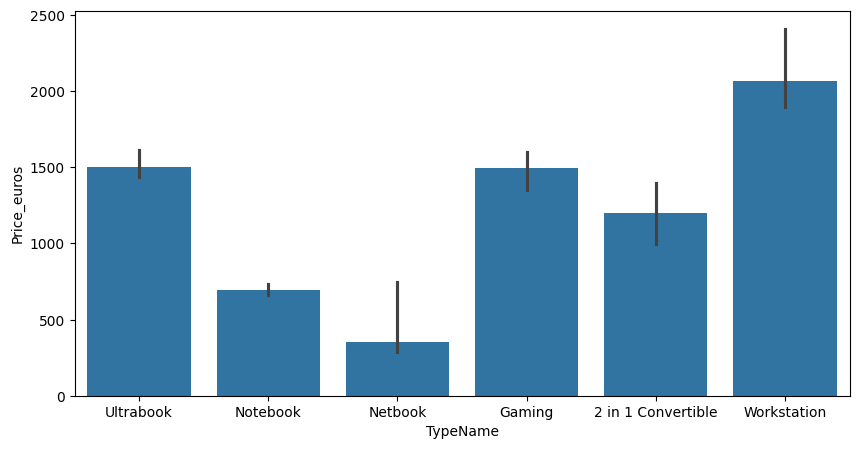

In [504]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x=df['TypeName'], y=df['Price_euros'], estimator=np.median)

#### Insight
##### TypeName can really help in prediction: workstationan and Gaming, Ultrabook type of laptop have the highest median prices

##### Create a new features from ScreenResolution feature

In [505]:
df[['Width', 'Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)', expand=True)
df['Width'] = df['Width'].astype(np.int32)
df['Height'] = df['Height'].astype(np.int32)
# df['Total number of pixels'] = df['Width'] + df['Heigth']

In [506]:
print(df['Width'].isna().sum())
print(df['Height'].isna().sum())
# print(df['Total number of pixels'].isna().sum())

0
0


In [507]:
def line_plot(feature, graph_name, axs, col):
    plot_df = df.sort_values(by=feature, ascending=True)[[feature, 'Price_euros']]
    # create line plot
    sns.lineplot(x=plot_df[feature], y=plot_df['Price_euros'], ax=axs[col])

    # add labels and title
    axs[col].set_xlabel(feature)
    axs[col].set_ylabel('Price_euros')
    axs[col].set_title(graph_name)

# fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# line_plot('Width', 'Price and Width relationship', axs, 0)

# line_plot('Heigth', 'Price and Heigth relationship', axs, 1)

# plt.show()

<Axes: xlabel='Inches', ylabel='Price_euros'>

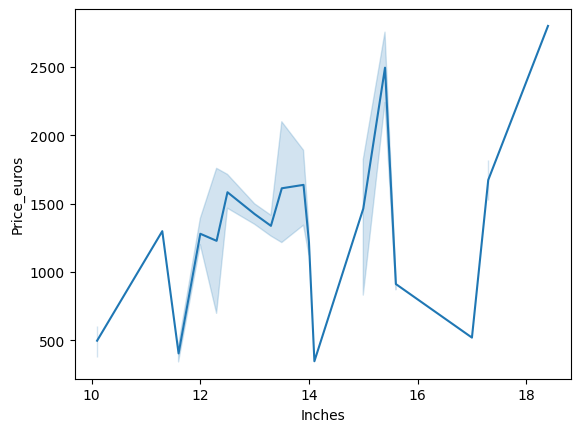

In [508]:
plot_df = df.sort_values(by='Inches', ascending=True)[['Inches', 'Price_euros']]
sns.lineplot(x=plot_df['Inches'], y=plot_df['Price_euros'])

In [509]:
import re
df['isTouchscreen'] = df['ScreenResolution'].str.contains('Touchscreen', flags=re.IGNORECASE)
# df.loc[df['IsTouchscreen']==True, 'IsTouchscreen'] = 'Yes'
# df.loc[df['IsTouchscreen']==False, 'IsTouchscreen'] = 'No'

In [510]:
# df.drop(columns=['IsTouchscreen'], inplace=True)
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Width,Height,isTouchscreen
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0,1920,1080,True
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0,3200,1800,True
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0,1366,768,False
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0,1366,768,False
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0,1366,768,False


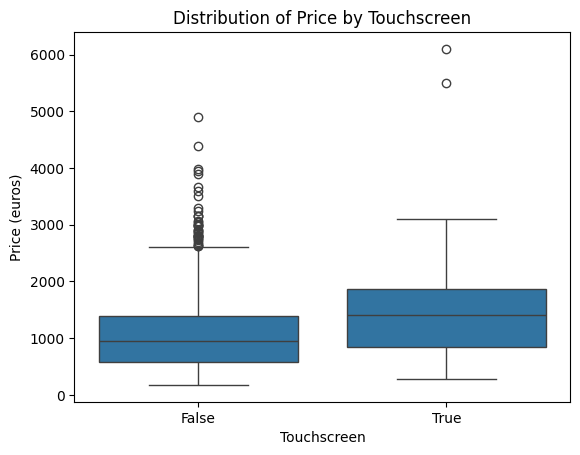

In [511]:
# sns.barplot(data=df, x=df['isTouchscreen'], y=df['Price_euros'], estimator=np.mean)

# Create a box plot
sns.boxplot(data=df, x='isTouchscreen', y='Price_euros')

# Add labels and title
plt.xlabel('Touchscreen')
plt.ylabel('Price (euros)')
plt.title('Distribution of Price by Touchscreen')

# Show plot
plt.show()

#### isTouchScreen feature will be helpful in predicting price

In [512]:
df.drop(columns='ScreenResolution', inplace=True)

### Create new feature from Cpu

In [513]:
df['CpuProducer'] = df['Cpu'].str.extract(r'^(\w+)', expand=True)
df['CpuSpeed (GHz)'] = df['Cpu'].str.extract(r'(\d\.\d*|\d)GHz', expand=True)

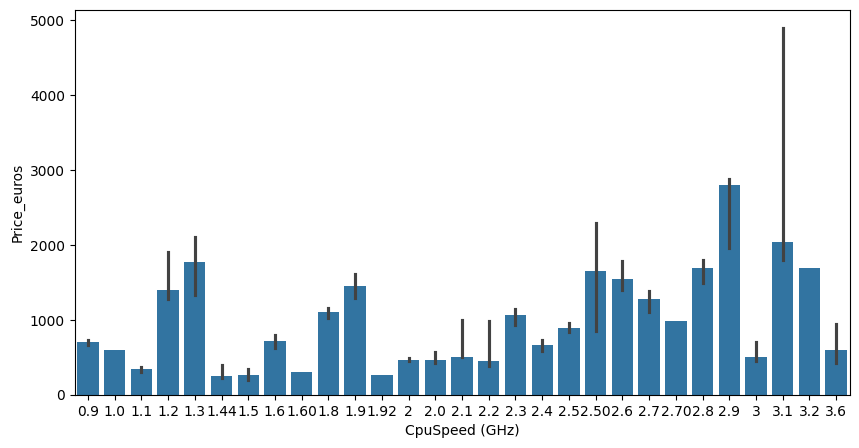

In [514]:
ordered_speed = df['CpuSpeed (GHz)'].sort_values().unique()
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='CpuSpeed (GHz)', y='Price_euros', estimator='median', order=ordered_speed)
plt.show()

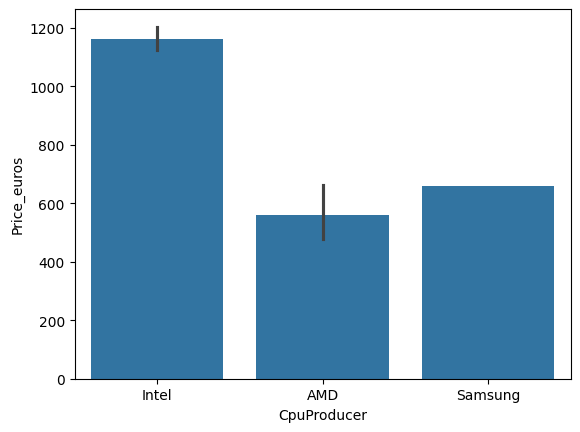

In [515]:
sns.barplot(data=df, x='CpuProducer', y='Price_euros', estimator='mean')
plt.show()



In [516]:
df.drop(columns='Cpu', inplace=True)

### Feature engineering for Memory features

In [517]:
# sns.barplot(data=df, x='Ram', y='Price_euros', estimator='median')
# plt.show()
df

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Width,Height,isTouchscreen,CpuProducer,CpuSpeed (GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,False,Intel,2.3
1,Apple,Macbook Air,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,False,Intel,1.8
2,HP,250 G6,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,False,Intel,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800,False,Intel,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600,False,Intel,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1920,1080,True,Intel,2.5
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,3200,1800,True,Intel,2.5
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,1366,768,False,Intel,1.6
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,1366,768,False,Intel,2.5


In [518]:
df[['Memory1', 'Memory2']] = df['Memory'].str.split('+', expand=True)
df['Memory1'] = df['Memory1'].str.strip()
df['Memory2'] = df['Memory2'].str.strip()

In [519]:
df.loc[df['Memory2'].isnull(), 'Memory2'] = '0GB NoType'


In [520]:
df[['MemorySize1', 'MemoryType1']] = df['Memory1'].str.extract(r'(^\d+\.?\d*\w{2})\s(.+)', expand=True)
df['MemorySize1'] = df['MemorySize1'].str.strip()
df['MemoryType1'] = df['MemoryType1'].str.strip()
df[['MemorySize2', 'MemoryType2']] = df['Memory2'].str.extract(r'(^\d+\.?\d*\w{2})\s?(.+)', expand=True)
df['MemorySize2'] = df['MemorySize2'].str.strip()
df['MemoryType2'] = df['MemoryType2'].str.strip()

### Test new way of engineering Memory feature

In [521]:
df['isNotTB1'] = ~df['MemorySize1'].str.contains('TB')
df.loc[df['isNotTB1']==False, 'isNotTB1'] = 1024
df['isNotTB2'] = ~df['MemorySize2'].str.contains('TB')
df.loc[df['isNotTB2']==False, 'isNotTB2'] = 1024


/var/folders/1g/q13cs_s54gz8b27r5pn3b9t00000gn/T/ipykernel_3605/245866378.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1024' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['isNotTB1']==False, 'isNotTB1'] = 1024
/var/folders/1g/q13cs_s54gz8b27r5pn3b9t00000gn/T/ipykernel_3605/245866378.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1024' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['isNotTB2']==False, 'isNotTB2'] = 1024


In [522]:
df['MemoryType2'].unique()

array(['NoType', 'HDD', 'SSD', 'Hybrid'], dtype=object)

In [523]:
df['MemorySize1'] = df['MemorySize1'].str.extract(r'(\d+)').astype(np.int32)
df['MemorySize2'] = df['MemorySize2'].str.extract(r'(\d+)').astype(np.int32)


In [524]:
df['MemorySize1'] = df['MemorySize1'] * df['isNotTB1']
df['MemorySize2'] = df['MemorySize2'] * df['isNotTB2']

In [525]:
# df[(df['MemorySize1']>0) & (df['MemorySize2']>0)]
df.drop(columns=['isNotTB1', 'isNotTB2', 'Memory1', 'Memory2', 'Memory'], inplace=True)

In [526]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [527]:
# memory1 = df[['MemorySize1', 'MemoryType1']]
# memory2 = df[['MemorySize2', 'MemoryType2']]

# pivoted_memory1 = memory1.pivot(columns='MemoryType1', values='MemorySize1')
# pivoted_memory1.fillna(0, inplace=True)

# pivoted_memory2 = memory2.pivot(columns='MemoryType2', values='MemorySize2')
# pivoted_memory2.drop(columns='NoType', inplace=True)
# pivoted_memory2.fillna(0, inplace=True)

In [528]:
# combined = pivoted_memory1[['HDD', 'Hybrid', 'SSD']] + pivoted_memory2
# combined['Flash Storage'] = pivoted_memory1['Flash Storage']
# combined 

In [529]:
# new_df = df.merge(combined, left_index=True, right_index=True)


In [530]:
# new_df.drop(columns=['Memory', 'MemorySize1', 'MemorySize2', 'MemoryType1', 'MemoryType2'], inplace=True)

In [531]:
# df['MemoryType'] = df['MemoryType1'].str.strip() + ', ' + df['MemoryType2'].str.strip()
# df['MemoryType'] = df.apply(lambda x: x['MemoryType1'] if x['MemoryType1'] == x['MemoryType2']\
#                             else x['MemoryType1'] + ', ' + x['MemoryType2'], axis=1)
# df['MemoryType'] = df['MemoryType'].str.replace(', NoType', '')

In [532]:
# ordered = df['CombinedMemoryCapacity (GB)'].sort_values().unique()
# sns.barplot(data=df, x='CombinedMemoryCapacity (GB)', y='Price_euros', estimator='median', order=ordered)
# plt.show()

### GPU and OPSYS

In [533]:
df['GpuProducer'] = df['Gpu'].str.extract(r'(^\w+)')

In [534]:
df['GpuProducer'].value_counts()

GpuProducer
Intel     704
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [535]:
# Because there is only 1 ARm and this could affect the model so will be removed
df = df[df['GpuProducer']!='ARM']

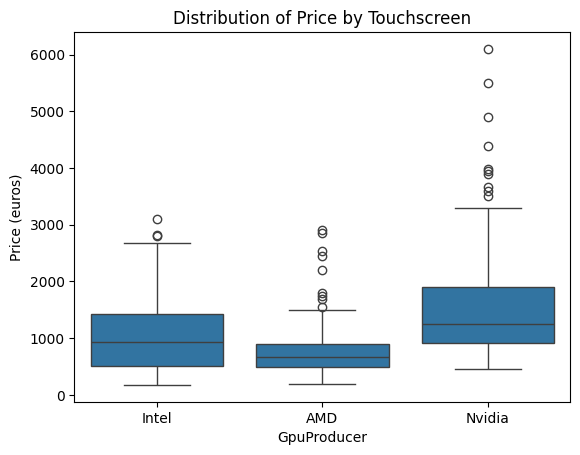

In [536]:
# sns.barplot(data=df, x='GpuProducer', y='Price_euros', estimator='mean')
# plt.show()

# Create a box plot
sns.boxplot(data=df, x='GpuProducer', y='Price_euros')

# Add labels and title
plt.xlabel('GpuProducer')
plt.ylabel('Price (euros)')
plt.title('Distribution of Price by Touchscreen')

# Show plot
plt.show()

In [537]:
# group Windows 10 S and Android into Other category while Mac 0S X to macOS
# otherOpSys = ['Windows 10 S', 'Android']
# df.loc[df['OpSys'].isin(otherOpSys), 'OpSys'] = 'Other'
# df.loc[df['OpSys'] == 'Mac OS X', 'OpSys'] = 'macOS'


In [538]:
# i just dropn Opsys without anything done on it
df.drop(columns=['Gpu', 'OpSys'], inplace=True)

/var/folders/1g/q13cs_s54gz8b27r5pn3b9t00000gn/T/ipykernel_3605/4167867468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu', 'OpSys'], inplace=True)


In [539]:
np.iinfo(np.uint8)

iinfo(min=0, max=255, dtype=uint8)

### Preparing Ram and Weight features

In [540]:
df['Ram (GB)'] = df['Ram'].str.replace('GB', '').astype(np.uint8)
df['Weight (kg)'] = df['Weight'].str.replace('kg', '')



/var/folders/1g/q13cs_s54gz8b27r5pn3b9t00000gn/T/ipykernel_3605/213564305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ram (GB)'] = df['Ram'].str.replace('GB', '').astype(np.uint8)
/var/folders/1g/q13cs_s54gz8b27r5pn3b9t00000gn/T/ipykernel_3605/213564305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight (kg)'] = df['Weight'].str.replace('kg', '').astype(float).round(1).astype(np.float16)


In [541]:
df.drop(columns=['Ram', 'Weight', 'Product'], inplace=True)

/var/folders/1g/q13cs_s54gz8b27r5pn3b9t00000gn/T/ipykernel_3605/1233981048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Ram', 'Weight', 'Product'], inplace=True)


In [542]:
# Define the new column order
new_order = [*df.columns[:3], *df.columns[4:], df.columns[3]]

# Use the reindex method to create a new DataFrame with the columns in the new order
cleaned_df = df.reindex(columns=new_order)

In [543]:
cleaned_df

,Company,TypeName,Inches,Width,Height,isTouchscreen,CpuProducer,CpuSpeed (GHz),MemorySize1,MemoryType1,MemorySize2,MemoryType2,GpuProducer,Ram (GB),Weight (kg),Price_euros
0,Apple,Ultrabook,13.3,2560,1600,False,Intel,2.3,128,SSD,0,NoType,Intel,8,1.400391,1339.69
1,Apple,Ultrabook,13.3,1440,900,False,Intel,1.8,128,Flash Storage,0,NoType,Intel,8,1.299805,898.94
2,HP,Notebook,15.6,1920,1080,False,Intel,2.5,256,SSD,0,NoType,Intel,8,1.900391,575.00
3,Apple,Ultrabook,15.4,2880,1800,False,Intel,2.7,512,SSD,0,NoType,AMD,16,1.799805,2537.45
4,Apple,Ultrabook,13.3,2560,1600,False,Intel,3.1,256,SSD,0,NoType,Intel,8,1.400391,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,2 in 1 Convertible,14.0,1920,1080,True,Intel,2.5,128,SSD,0,NoType,Intel,4,1.799805,638.00
1271,Lenovo,2 in 1 Convertible,13.3,3200,1800,True,Intel,2.5,512,SSD,0,NoType,Intel,16,1.299805,1499.00
1272,Lenovo,Notebook,14.0,1366,768,False,Intel,1.6,64,Flash Storage,0,NoType,Intel,2,1.500000,229.00
1273,HP,Notebook,15.6,1366,768,False,Intel,2.5,1024,HDD,0,NoType,AMD,6,2.199219,764.00


### Save cleaned data

In [544]:
cleaned_df.dtypes

Company            object
TypeName           object
Inches            float64
Width               int32
Height              int32
isTouchscreen        bool
CpuProducer        object
CpuSpeed (GHz)     object
MemorySize1        object
MemoryType1        object
MemorySize2        object
MemoryType2        object
GpuProducer        object
Ram (GB)            uint8
Weight (kg)       float16
Price_euros       float64
dtype: object

In [545]:
cleaned_df['MemorySize1'] = cleaned_df['MemorySize1'].astype(np.int32)
cleaned_df['MemorySize2'] = cleaned_df['MemorySize2'].astype(np.int32)



In [546]:
cleaned_df

,Company,TypeName,Inches,Width,Height,isTouchscreen,CpuProducer,CpuSpeed (GHz),MemorySize1,MemoryType1,MemorySize2,MemoryType2,GpuProducer,Ram (GB),Weight (kg),Price_euros
0,Apple,Ultrabook,13.3,2560,1600,False,Intel,2.3,128,SSD,0,NoType,Intel,8,1.400391,1339.69
1,Apple,Ultrabook,13.3,1440,900,False,Intel,1.8,128,Flash Storage,0,NoType,Intel,8,1.299805,898.94
2,HP,Notebook,15.6,1920,1080,False,Intel,2.5,256,SSD,0,NoType,Intel,8,1.900391,575.00
3,Apple,Ultrabook,15.4,2880,1800,False,Intel,2.7,512,SSD,0,NoType,AMD,16,1.799805,2537.45
4,Apple,Ultrabook,13.3,2560,1600,False,Intel,3.1,256,SSD,0,NoType,Intel,8,1.400391,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,2 in 1 Convertible,14.0,1920,1080,True,Intel,2.5,128,SSD,0,NoType,Intel,4,1.799805,638.00
1271,Lenovo,2 in 1 Convertible,13.3,3200,1800,True,Intel,2.5,512,SSD,0,NoType,Intel,16,1.299805,1499.00
1272,Lenovo,Notebook,14.0,1366,768,False,Intel,1.6,64,Flash Storage,0,NoType,Intel,2,1.500000,229.00
1273,HP,Notebook,15.6,1366,768,False,Intel,2.5,1024,HDD,0,NoType,AMD,6,2.199219,764.00


In [547]:
cleaned_df.to_csv('data/cleaned_data.csv', index=False)